In [78]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

sns.set_theme(style="whitegrid")

In [79]:
train_df = pd.read_csv('Resources/train.csv')
train_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [80]:
train_df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [81]:
# Drop NA values
burnout_train = train_df.dropna()
burnout_train.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [82]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,22750.0,2.178725,1.135145,0.0,1.00,2.00,3.00,5.0
Resource Allocation,21369.0,4.481398,2.047211,1.0,3.00,4.00,6.00,10.0
Mental Fatigue Score,20633.0,5.728188,1.920839,0.0,4.60,5.90,7.10,10.0
Burn Rate,21626.0,0.452005,0.198226,0.0,0.31,0.45,0.59,1.0


In [83]:
train_df2 = burnout_train.copy()

In [84]:
train_df2.nunique()

Employee ID             18590
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

In [85]:
# Map categorical values to numerical values.
train_df2['Gender'] = train_df2['Gender'].map({'Female': 1, 'Male': 0})
train_df2['Company Type'] = train_df2['Company Type'].map({'Service': 1, 'Product': 0})
train_df2['WFH Setup Available'] = train_df2['WFH Setup Available'].map({'Yes': 1, 'No': 0})

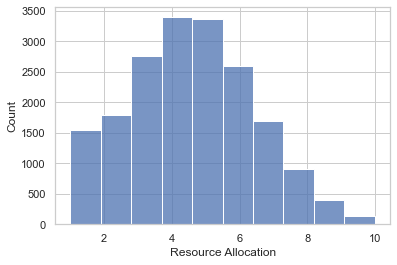

In [86]:
sns.histplot(data=burnout_train, x='Resource Allocation', bins=10);

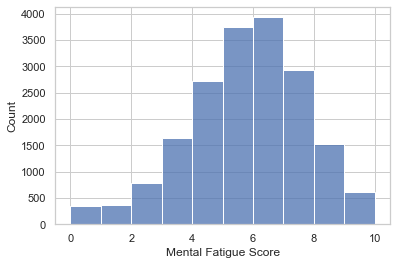

In [87]:
sns.histplot(data=burnout_train, x='Mental Fatigue Score', bins=10);

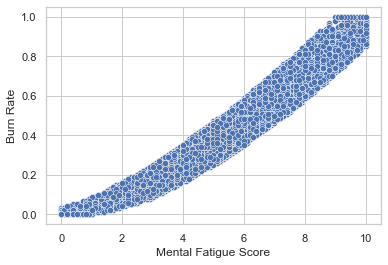

In [88]:
sns.scatterplot(data=train_df2, x='Mental Fatigue Score', y='Burn Rate');

/var/folders/mk/bhfym4gn0xnc981k93pfv7r80000gn/T/ipykernel_6639/1941227300.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df2.corr()


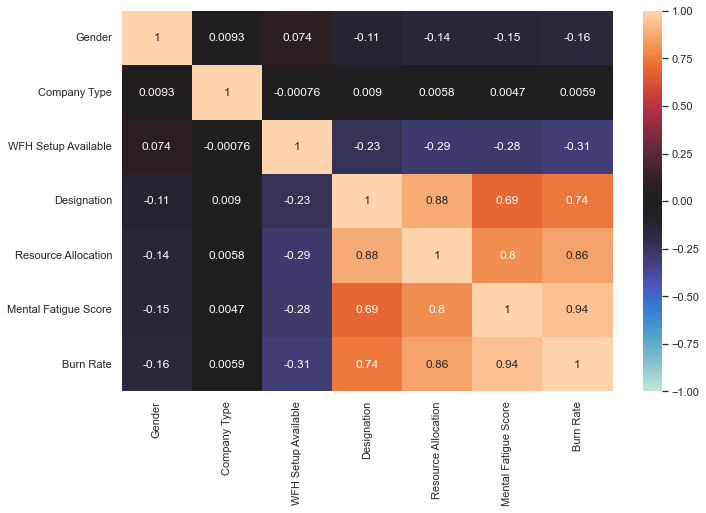

In [89]:
plt.figure(figsize=(11,7))
corr = train_df2.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

In [90]:
scaler = StandardScaler()

In [91]:
# Drop the non-required columns
drop_list = ['Employee ID', 'Date of Joining', 'Company Type']
train_df3 = train_df2.drop(drop_list, axis=1)


In [92]:
# Create the features (X) and target (y) sets
X = np.array(train_df3.drop('Burn Rate', axis=1))
y = np.array(train_df3['Burn Rate'])

In [93]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [94]:
from sklearn.linear_model import LinearRegression
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  # Note: Use np.sqrt to get the Root Mean Squared Error (RMSE)
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 0.04552053854113684
RMSE: 0.055353364972744915
R2: 0.9202184076229089


### Test Data
Loading in a dataset without burnout scores to test the predictive ability of the model

In [95]:
# Load in the test.csv dataset to see what sort of burnout scores will be generated
test_df = pd.read_csv('Resources/test.csv')
test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [96]:
# Check test_df for any null values
test_df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [97]:
test_df['Gender'] = test_df['Gender'].map({'Female': 1, 'Male': 0})
test_df['Company Type'] = test_df['Company Type'].map({'Service': 1, 'Product': 0})
test_df['WFH Setup Available'] = test_df['WFH Setup Available'].map({'Yes': 1, 'No': 0})

test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,1,1,0,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,1,0,1,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,0,0,1,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,1,1,0,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,1,0,0,2.0,5.0,6.4


In [100]:
# Drop unnecessary columns
test_df2 = test_df.drop(drop_list, axis=1)
test_df2.head()

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,1,0,2.0,5.0,7.7
1,1,1,1.0,2.0,5.2
2,0,1,1.0,3.0,5.9
3,1,0,3.0,6.0,4.6
4,1,0,2.0,5.0,6.4


In [101]:
# Standardize and transform the test_df data for model input
X_testrun = np.array(test_df2)
X_testrun_prepped = scaler.fit_transform(X_testrun)

y_testrun = model.predict(X_testrun_prepped)

y_testrun

array([0.61958491, 0.34183291, 0.42703179, ..., 0.81331178, 0.57383623,
       0.11048751])

In [102]:
test_df['Burnout Score'] = y_testrun
test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burnout Score
0,fffe31003300390039003000,2008-12-10,1,1,0,2.0,5.0,7.7,0.619585
1,fffe31003300310037003800,2008-08-14,1,0,1,1.0,2.0,5.2,0.341833
2,fffe33003400380035003900,2008-11-13,0,0,1,1.0,3.0,5.9,0.427032
3,fffe3100370039003200,2008-02-07,1,1,0,3.0,6.0,4.6,0.413007
4,fffe32003600390036003700,2008-07-17,1,0,0,2.0,5.0,6.4,0.522940


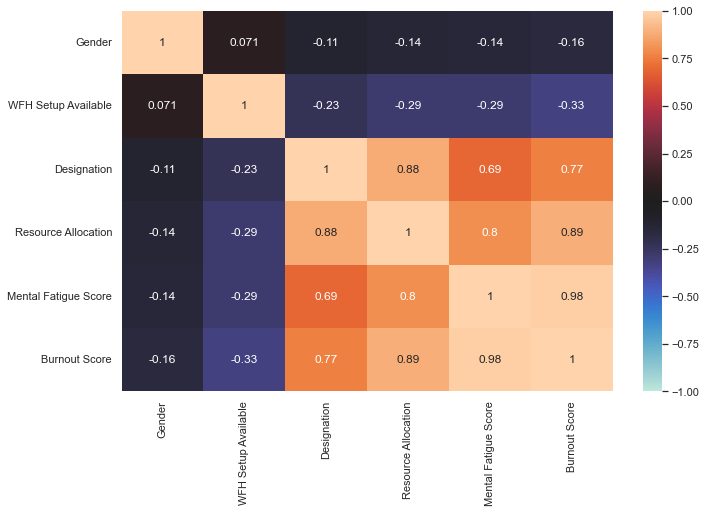

In [104]:
# Heatmap the correlations
test_df2["Burnout Score"] = y_testrun
corr_test = test_df2.corr()

plt.figure(figsize=(11,7))
sns.heatmap(corr_test, vmin=-1, center=0, vmax=1, annot=True);